# Loan Prediction Project

Dataset_link: https://www.kaggle.com/datasets/ninzaami/loan-predication

In [5]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Read Dataset

In [7]:
LD = pd.read_csv(r'''C:\Users\USER\OneDrive\Desktop\Naresh\DS and ML Projects\Data\Loan_data\Loan_data.csv''')
LD.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### EDA

In [9]:
LD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
LD.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
LD.describe(include = object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [12]:
#Checking for null values if any
LD.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#Filling null values
LD["Gender"].fillna(LD["Gender"].mode()[0], inplace = True)
LD["Married"].fillna(LD["Married"].mode()[0], inplace = True)
LD["Dependents"].fillna(LD["Dependents"].mode()[0], inplace = True)
LD["Self_Employed"].fillna(LD["Self_Employed"].mode()[0], inplace = True)

LD["LoanAmount"].fillna(LD["LoanAmount"].mean(), inplace = True)
LD["Loan_Amount_Term"].fillna(LD["Loan_Amount_Term"].mean(), inplace = True)
LD["Credit_History"].fillna(LD["Credit_History"].mode()[0], inplace = True)

LD.isnull().sum().reset_index()

,index,0
0,Loan_ID,0
1,Gender,0
2,Married,0
3,Dependents,0
4,Education,0
5,Self_Employed,0
6,ApplicantIncome,0
7,CoapplicantIncome,0
8,LoanAmount,0
9,Loan_Amount_Term,0


In [14]:
#Checking for duplicate values if any
LD[LD.duplicated()].sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area          0
Loan_Status            0
dtype: object

### Vizualization

Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

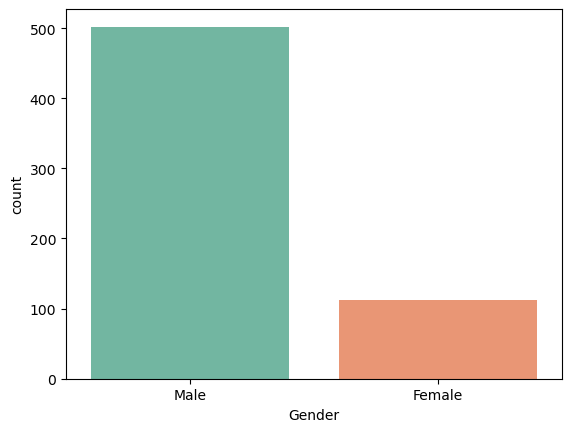

In [16]:
#Gender count
print(LD["Gender"].value_counts())
sns.countplot(x = "Gender", data = LD, palette = "Set2")

Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

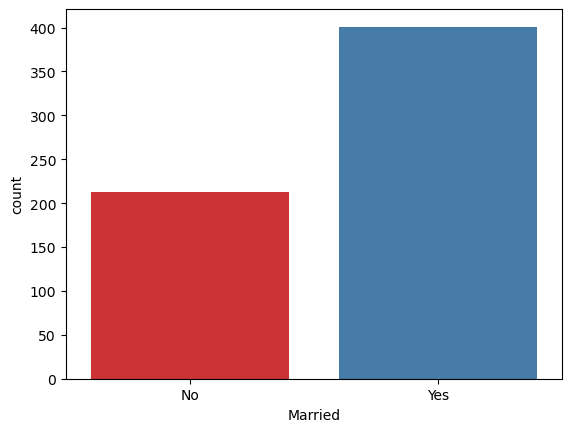

In [17]:
print(LD["Married"].value_counts())
sns.countplot(x = "Married", data = LD, palette = "Set1")

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

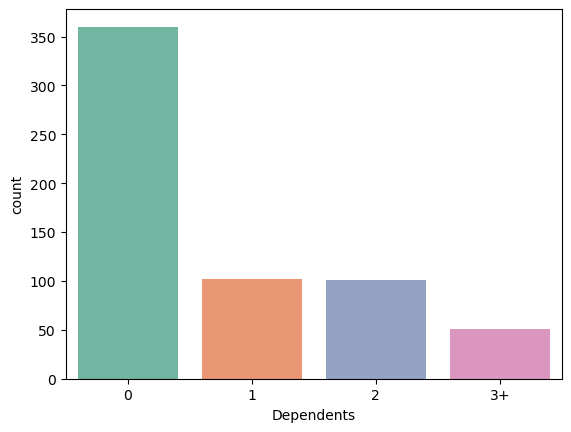

In [18]:
print(LD["Dependents"].value_counts())
sns.countplot(x = "Dependents", data = LD, palette = "Set2")

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

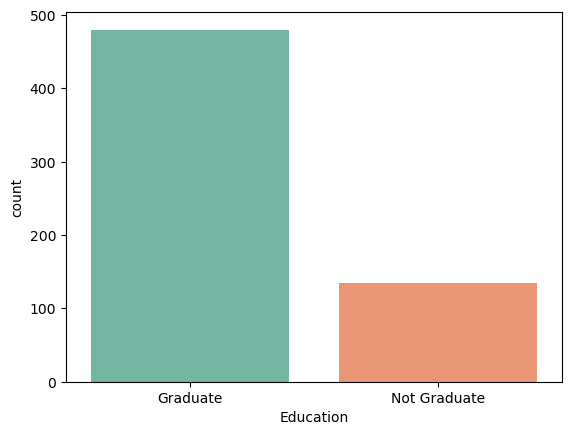

In [19]:
print(LD["Education"].value_counts())
sns.countplot(x = "Education", data = LD, palette = "Set2")

Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

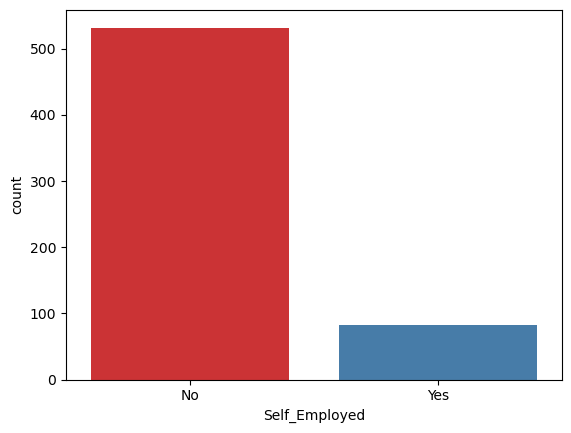

In [20]:
print(LD["Self_Employed"].value_counts())
sns.countplot(x = "Self_Employed", data = LD, palette = "Set1")

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


<Axes: xlabel='Property_Area', ylabel='count'>

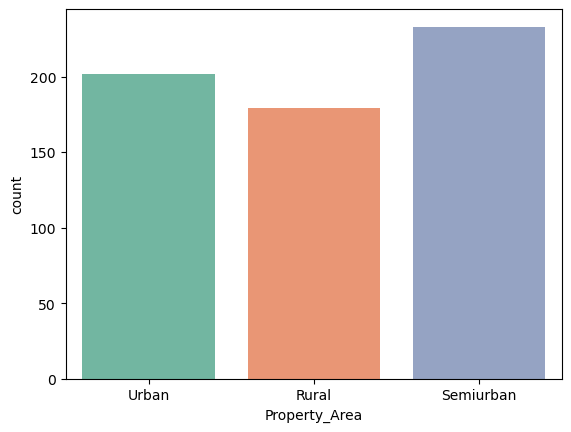

In [21]:
print(LD["Property_Area"].value_counts())
sns.countplot(x = "Property_Area", data = LD, palette = "Set2")

Loan_Status
Y    422
N    192
Name: count, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

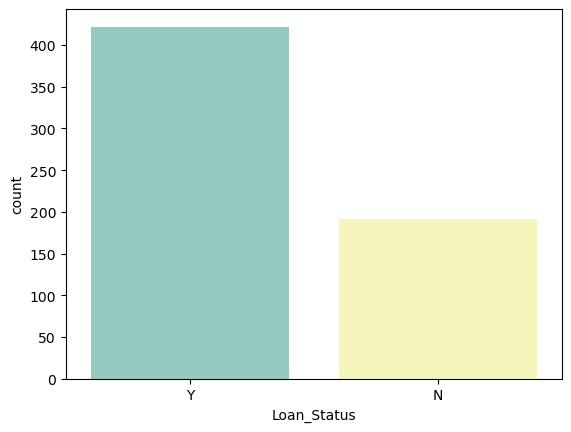

In [22]:
print(LD["Loan_Status"].value_counts())
sns.countplot(x = "Loan_Status", data = LD, palette = "Set3")

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

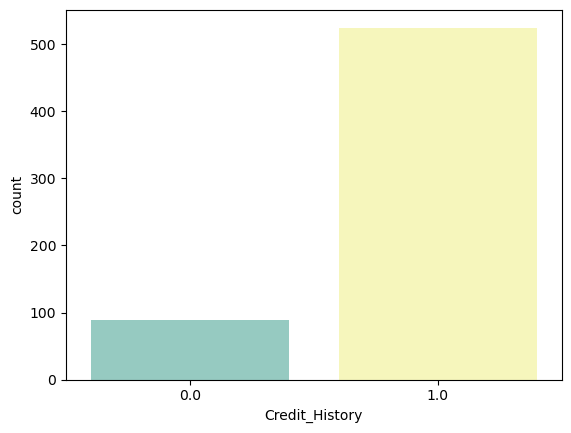

In [23]:
print(LD["Credit_History"].value_counts())
sns.countplot(x = "Credit_History", data = LD, palette = "Set3")

### Outlier Detection

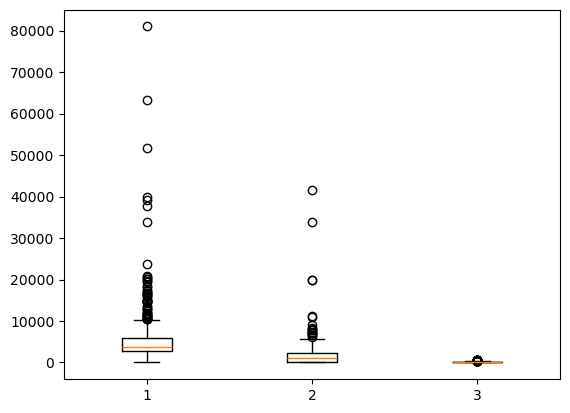

In [25]:
plt.boxplot(LD[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]])
plt.show()

In [26]:
LD[(LD["ApplicantIncome"] >= 10000) | (LD["CoapplicantIncome"] >= 10000)].count()

Loan_ID              60
Gender               60
Married              60
Dependents           60
Education            60
Self_Employed        60
ApplicantIncome      60
CoapplicantIncome    60
LoanAmount           60
Loan_Amount_Term     60
Credit_History       60
Property_Area        60
Loan_Status          60
dtype: int64

In [27]:
LD[(LD["ApplicantIncome"] <= 10000) | (LD["CoapplicantIncome"] >= 10000)].count()

Loan_ID              563
Gender               563
Married              563
Dependents           563
Education            563
Self_Employed        563
ApplicantIncome      563
CoapplicantIncome    563
LoanAmount           563
Loan_Amount_Term     563
Credit_History       563
Property_Area        563
Loan_Status          563
dtype: int64

In [28]:
#Droping Outlier data from the dataset 
drop_rows = LD[(LD["ApplicantIncome"] >= 10000) | (LD["CoapplicantIncome"] >= 10000)].index
print(len(drop_rows))
LD = LD.drop(drop_rows).reset_index(drop=True)
LD.info()

60
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            554 non-null    object 
 1   Gender             554 non-null    object 
 2   Married            554 non-null    object 
 3   Dependents         554 non-null    object 
 4   Education          554 non-null    object 
 5   Self_Employed      554 non-null    object 
 6   ApplicantIncome    554 non-null    int64  
 7   CoapplicantIncome  554 non-null    float64
 8   LoanAmount         554 non-null    float64
 9   Loan_Amount_Term   554 non-null    float64
 10  Credit_History     554 non-null    float64
 11  Property_Area      554 non-null    object 
 12  Loan_Status        554 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 56.4+ KB


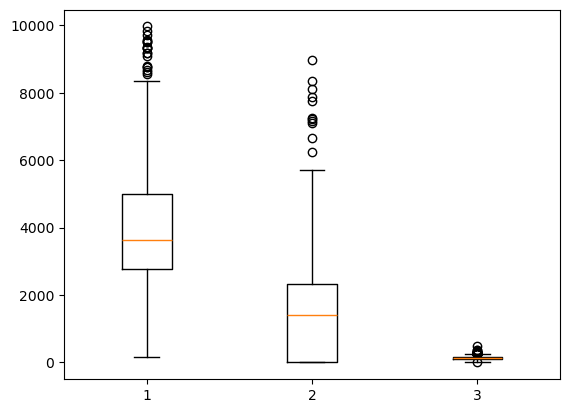

In [29]:
plt.boxplot(LD[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]])
plt.show()

In [30]:
LD[(LD["ApplicantIncome"] <= 10000) | (LD["CoapplicantIncome"] >= 10000)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
550,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
551,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
552,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [31]:
obj_col = LD.select_dtypes(include = ["object"]).columns
obj_col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Converting object data to numeric data using "LabelEncoders"

In [33]:
#Preprocess the object data to numerical value
from sklearn.preprocessing import LabelEncoder

label_encoders = {col: LabelEncoder() for col in obj_col}
label_encoders

{'Loan_ID': LabelEncoder(),
 'Gender': LabelEncoder(),
 'Married': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'Education': LabelEncoder(),
 'Self_Employed': LabelEncoder(),
 'Property_Area': LabelEncoder(),
 'Loan_Status': LabelEncoder()}

In [34]:
#Fit_Transform Object data to numeric values
for col in obj_col:
    LD[col] = label_encoders[col].fit_transform(LD[col])
LD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            554 non-null    int32  
 1   Gender             554 non-null    int32  
 2   Married            554 non-null    int32  
 3   Dependents         554 non-null    int32  
 4   Education          554 non-null    int32  
 5   Self_Employed      554 non-null    int32  
 6   ApplicantIncome    554 non-null    int64  
 7   CoapplicantIncome  554 non-null    float64
 8   LoanAmount         554 non-null    float64
 9   Loan_Amount_Term   554 non-null    float64
 10  Credit_History     554 non-null    float64
 11  Property_Area      554 non-null    int32  
 12  Loan_Status        554 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 39.1 KB


In [114]:
correlation = LD.corr()
correlation

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.015600,-0.012167,0.063985,0.038071,0.004025,0.032477,-0.039371,0.050636,-0.040446,-0.058380,-0.175915,-0.007415
Gender,-0.015600,1.000000,0.373166,0.183605,0.061807,0.021179,0.121917,0.187119,0.168561,-0.085442,0.020340,-0.011099,0.030529
Married,-0.012167,0.373166,1.000000,0.336138,0.024461,0.014008,0.010409,0.238906,0.181865,-0.090982,0.009961,0.015211,0.072421
Dependents,0.063985,0.183605,0.336138,1.000000,0.077443,0.071161,0.136897,-0.035070,0.130644,-0.085911,-0.026778,0.012169,0.011451
Education,0.038071,0.061807,0.024461,0.077443,1.000000,-0.003302,-0.157979,-0.064819,-0.137692,-0.085515,-0.080351,-0.063790,-0.110345
Self_Employed,0.004025,0.021179,0.014008,0.071161,-0.003302,1.000000,0.200314,-0.014006,0.134519,-0.063230,0.021695,-0.067289,0.005012
ApplicantIncome,0.032477,0.121917,0.010409,0.136897,-0.157979,0.200314,1.000000,-0.151652,0.509110,-0.043905,0.043714,-0.077925,0.025814
CoapplicantIncome,-0.039371,0.187119,0.238906,-0.035070,-0.064819,-0.014006,-0.151652,1.000000,0.403963,-0.030355,-0.004060,-0.081477,0.055050
LoanAmount,0.050636,0.168561,0.181865,0.130644,-0.137692,0.134519,0.509110,0.403963,1.000000,0.081478,0.018927,-0.104906,-0.010146
Loan_Amount_Term,-0.040446,-0.085442,-0.090982,-0.085911,-0.085515,-0.063230,-0.043905,-0.030355,0.081478,1.000000,-0.015835,-0.075230,-0.017772


<Axes: >

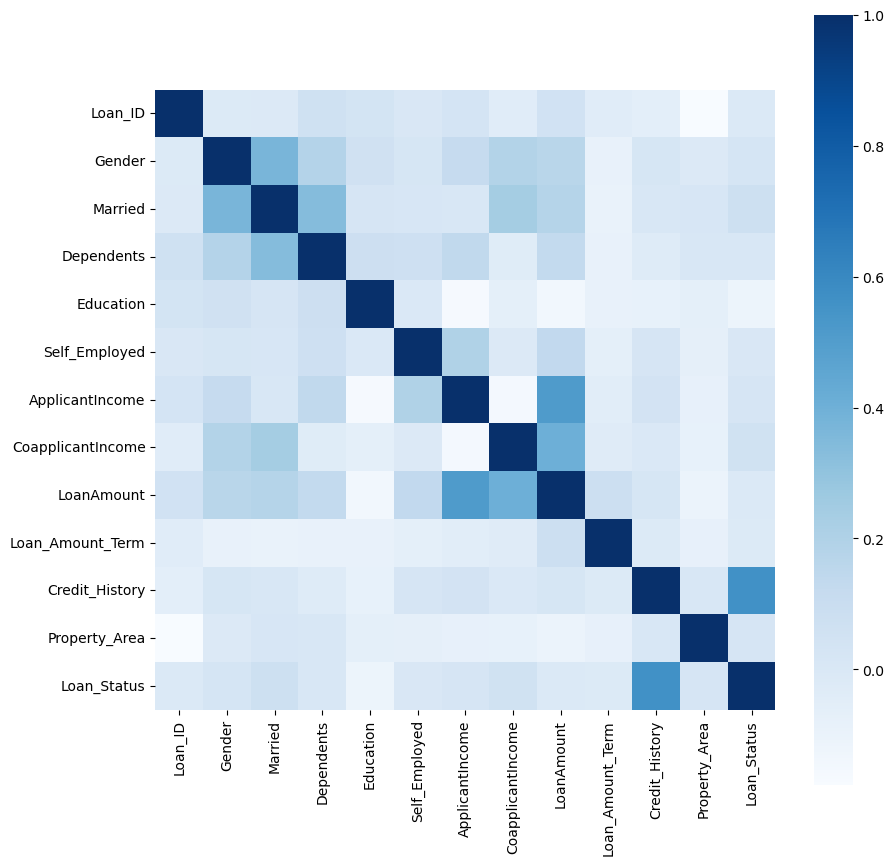

In [118]:
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar = True, square = True, cmap = "Blues")

### Spliting Data 

In [37]:
#Splitting feature and Target data

X = LD.drop(["Loan_Status"], axis = 1)
y = LD["Loan_Status"]
LD

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,549,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
550,550,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
551,551,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
552,552,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [38]:
num_col = LD.drop(["Loan_Status"], axis = 1).select_dtypes(include = ["number"]).columns
num_col.size

12

### Scaling the data using standardize method

In [40]:
#Scaling the numerical data to fit into a same scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

LD[num_col] = scaler.fit_transform(LD[num_col])
LD

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,-1.728927,0.466457,-1.373105,-0.72807,-0.559282,-0.361403,0.955119,-0.885868,0.251749,0.275592,0.413820,1.242022,1
1,-1.722674,0.466457,0.728277,0.27529,-0.559282,-0.361403,0.268800,0.010133,-0.083161,0.275592,0.413820,-1.297019,0
2,-1.716421,0.466457,0.728277,-0.72807,-0.559282,2.766993,-0.589371,-0.885868,-1.210915,0.275592,0.413820,1.242022,1
3,-1.710168,0.466457,0.728277,-0.72807,1.788007,-0.361403,-0.815433,0.515173,-0.228678,0.275592,0.413820,1.242022,1
4,-1.703916,0.466457,-1.373105,-0.72807,-0.559282,-0.361403,1.036979,-0.885868,0.153304,0.275592,0.413820,1.242022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,1.703916,-2.143819,-1.373105,-0.72807,-0.559282,-0.361403,-0.643582,-0.885868,-1.119967,0.275592,0.413820,-1.297019,1
550,1.710168,0.466457,0.728277,2.28201,-0.559282,-0.361403,0.010210,-0.885868,-1.683844,-2.497014,0.413820,-1.297019,1
551,1.716421,0.466457,0.728277,0.27529,-0.559282,-0.361403,2.160244,-0.743268,2.190536,0.275592,0.413820,1.242022,1
552,1.722674,0.466457,0.728277,1.27865,-0.559282,-0.361403,1.895149,-0.885868,0.990024,0.275592,0.413820,1.242022,1


### Train, test split

In [42]:
#preparing for test_train_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)


In [43]:
y_train.shape, y_test.shape
y_train.value_counts(), y_test.value_counts()

(Loan_Status
 1    306
 0    137
 Name: count, dtype: int64,
 Loan_Status
 1    80
 0    31
 Name: count, dtype: int64)

### Model building using differnt classification Algorithms

### 1. Random_Forest_Classifier Model

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)

RF_y_pred = RF_clf.predict(X_test)

print("Accuracy of Random_Forest_Classifier is:", round(accuracy_score(RF_y_pred, y_test), 3))
print("\nClassification Report of Random_Forest_Classifier is: \n", classification_report(RF_y_pred, y_test))
print("\nConfusion matric of Random_Forest_Classifier is: \n", confusion_matrix(RF_y_pred, y_test))

Accuracy of Random_Forest_Classifier is: 0.82

Classification Report of Random_Forest_Classifier is: 
               precision    recall  f1-score   support

           0       0.55      0.74      0.63        23
           1       0.93      0.84      0.88        88

    accuracy                           0.82       111
   macro avg       0.74      0.79      0.76       111
weighted avg       0.85      0.82      0.83       111


Confusion matric of Random_Forest_Classifier is: 
 [[17  6]
 [14 74]]


### 2. Naive Bayes Classifier

In [48]:
from sklearn.naive_bayes import GaussianNB

NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)

NB_y_pred = NB_clf.predict(X_test)

print("Accuracy of Naive_Bayes_Classifier is:", round(accuracy_score(NB_y_pred, y_test), 3))
print("\nClassification Report of Naive_Bayes_Classifier is: \n", classification_report(NB_y_pred, y_test))
print("\nConfusion matric of Naive_Bayes_Classifier is: \n", confusion_matrix(NB_y_pred, y_test))

Accuracy of Naive_Bayes_Classifier is: 0.856

Classification Report of Naive_Bayes_Classifier is: 
               precision    recall  f1-score   support

           0       0.52      0.94      0.67        17
           1       0.99      0.84      0.91        94

    accuracy                           0.86       111
   macro avg       0.75      0.89      0.79       111
weighted avg       0.92      0.86      0.87       111


Confusion matric of Naive_Bayes_Classifier is: 
 [[16  1]
 [15 79]]


### 3. Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train, y_train)

DT_y_pred = DT_clf.predict(X_test)

print("Accuracy of Decision_Tree_Classifier is:", round(accuracy_score(DT_y_pred, y_test), 3))
print("\nClassification Report of Decision_Tree_Classifier is: \n", classification_report(DT_y_pred, y_test))
print("\nConfusion matric of Naive_Bayes_Classifier is: \n", confusion_matrix(DT_y_pred, y_test))

Accuracy of Decision_Tree_Classifier is: 0.658

Classification Report of Decision_Tree_Classifier is: 
               precision    recall  f1-score   support

           0       0.52      0.41      0.46        39
           1       0.71      0.79      0.75        72

    accuracy                           0.66       111
   macro avg       0.61      0.60      0.60       111
weighted avg       0.64      0.66      0.65       111


Confusion matric of Naive_Bayes_Classifier is: 
 [[16 23]
 [15 57]]


### 4. KNearestNeighbors

In [52]:
from sklearn.neighbors import KNeighborsClassifier

KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train, y_train)

KNN_y_pred = KNN_clf.predict(X_test)

print("Accuracy of K_Neighbors_Classifier is:", round(accuracy_score(KNN_y_pred, y_test), 3))
print("\nClassification Report of K_Neighbors_Classifier is: \n", classification_report(KNN_y_pred, y_test))
print("\nConfusion matric of Naive_Bayes_Classifier is: \n", confusion_matrix(KNN_y_pred, y_test))

Accuracy of K_Neighbors_Classifier is: 0.577

Classification Report of K_Neighbors_Classifier is: 
               precision    recall  f1-score   support

           0       0.10      0.14      0.11        22
           1       0.76      0.69      0.72        89

    accuracy                           0.58       111
   macro avg       0.43      0.41      0.42       111
weighted avg       0.63      0.58      0.60       111


Confusion matric of Naive_Bayes_Classifier is: 
 [[ 3 19]
 [28 61]]


### 5. Support Vector Machine

In [54]:
from sklearn import svm

SVM_clf = svm.SVC()
SVM_clf.fit(X_train, y_train)

SVM_y_pred = SVM_clf.predict(X_test)

print("Accuracy of SVM_Classifier is:", round(accuracy_score(SVM_y_pred, y_test), 3))
print("\nClassification Report of SVM_Classifier is: \n", classification_report(SVM_y_pred, y_test, zero_division = 1))
print("\nConfusion matric of SVM_Classifier is: \n", confusion_matrix(SVM_y_pred, y_test))

Accuracy of SVM_Classifier is: 0.721

Classification Report of SVM_Classifier is: 
               precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       1.00      0.72      0.84       111

    accuracy                           0.72       111
   macro avg       0.50      0.86      0.42       111
weighted avg       1.00      0.72      0.84       111


Confusion matric of SVM_Classifier is: 
 [[ 0  0]
 [31 80]]


### 6. Stochastic Gradient Descent

In [56]:
from sklearn.linear_model import SGDClassifier

SGD_clf = SGDClassifier()
SGD_clf.fit(X_train, y_train)

SGD_y_pred = SGD_clf.predict(X_test)

print("Accuracy of Stochastic_Gradient_Descent_Classifier is:", round(accuracy_score(SGD_y_pred, y_test), 3))
print("\nClassification Report of Stochastic_Gradient_Descent_Classifier is: \n", classification_report(SGD_y_pred, y_test))
print("\nConfusion matric of Stochastic_Gradient_Descent_Classifier is: \n", confusion_matrix(SGD_y_pred, y_test))

Accuracy of Stochastic_Gradient_Descent_Classifier is: 0.721

Classification Report of Stochastic_Gradient_Descent_Classifier is: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.72      0.84       111

    accuracy                           0.72       111
   macro avg       0.50      0.36      0.42       111
weighted avg       1.00      0.72      0.84       111


Confusion matric of Stochastic_Gradient_Descent_Classifier is: 
 [[ 0  0]
 [31 80]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 7. Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

LGR_clf = LogisticRegression(max_iter = 1000)
LGR_clf.fit(X_train, y_train)

LGR_y_pred = LGR_clf.predict(X_test)

print("Accuracy of Logistic Regression_Classifier is:", round(accuracy_score(LGR_y_pred, y_test), 3))
print("\nClassification Report of Logistic Regression_Classifier is: \n", classification_report(LGR_y_pred, y_test))
print("\nConfusion matric of Logistic Regression_Classifier is: \n", confusion_matrix(LGR_y_pred, y_test))

Accuracy of Logistic Regression_Classifier is: 0.847

Classification Report of Logistic Regression_Classifier is: 
               precision    recall  f1-score   support

           0       0.48      0.94      0.64        16
           1       0.99      0.83      0.90        95

    accuracy                           0.85       111
   macro avg       0.74      0.88      0.77       111
weighted avg       0.91      0.85      0.86       111


Confusion matric of Logistic Regression_Classifier is: 
 [[15  1]
 [16 79]]


### Overall Accuracy score

In [60]:
print("Accuracy of Random_Forest_Classifier is:", round(accuracy_score(RF_y_pred, y_test), 3))
print("-"*100)
print("Accuracy of Naive_Bayes_Classifier is:", round(accuracy_score(NB_y_pred, y_test), 3))
print("-"*100)
print("Accuracy of Decision_Tree_Classifier is:", round(accuracy_score(DT_y_pred, y_test), 3))
print("-"*100)
print("Accuracy of K_Neighbors_Classifier is:", round(accuracy_score(KNN_y_pred, y_test), 3))
print("-"*100)
print("Accuracy of SVM_Classifier is:", round(accuracy_score(SVM_y_pred, y_test), 3))
print("-"*100)
print("Accuracy of Stochastic_Gradient_Descent_Classifier is:", round(accuracy_score(SGD_y_pred, y_test), 3))
print("-"*100)
print("Accuracy of Logistic Regression_Classifier is:", round(accuracy_score(LGR_y_pred, y_test), 3))
print("-"*100)

Accuracy of Random_Forest_Classifier is: 0.82
----------------------------------------------------------------------------------------------------
Accuracy of Naive_Bayes_Classifier is: 0.856
----------------------------------------------------------------------------------------------------
Accuracy of Decision_Tree_Classifier is: 0.658
----------------------------------------------------------------------------------------------------
Accuracy of K_Neighbors_Classifier is: 0.577
----------------------------------------------------------------------------------------------------
Accuracy of SVM_Classifier is: 0.721
----------------------------------------------------------------------------------------------------
Accuracy of Stochastic_Gradient_Descent_Classifier is: 0.721
----------------------------------------------------------------------------------------------------
Accuracy of Logistic Regression_Classifier is: 0.847
------------------------------------------------------------

### Predict with new data using the best model

In [62]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
549,549,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
550,550,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
551,551,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
552,552,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [63]:
new_data = {"Loan_ID": 554,"Gender": 0,	"Married": 1, "Dependents": 1, "Education": 0, "Self_Employed": 1, "ApplicantIncome": 5000, 
                   "CoapplicantIncome": 0.0, "LoanAmount": 700, "Loan_Amount_Term": 360.0, "Credit_History": 1.0, 	"Property_Area": 3}
df1 = pd.DataFrame(new_data, index = [0])
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,554,0,1,1,0,1,5000,0.0,700,360.0,1.0,3


In [64]:
NB_y_pred = NB_clf.predict(df1)

NB_y_pred

array([1])

### Save the best model for deployment

In [66]:
NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)

GaussianNB()

In [67]:
import joblib

joblib.dump(NB_clf, "Naive_Clf_model")

['Naive_Clf_model']

In [68]:
new = joblib.load("Naive_Clf_model")

new.predict(df1)

array([1])